# Projet : Deep Learning
*Par Arthur Couturier, Enzo Di Maria, José Colin, Rémi Bonrepaux & Yassir El Bsita*

<b> Classification d'images de fruits :</b> *apples, bananas, coconuts, grapes, lemons, limes, mangos, oranges, pineapples, tomatoes*.

<b>Lien vers la doc :</b> https://keras.io/api/

In [23]:
import sys
from random import randint
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<b> Accès à la base de données ainsi qu'aux scripts </b>
1. <b>Version distante :</b> Vous utilisez Google Colab. Dans ce cas vous devrez cloner le dépôt GitHub en exécutant la portion (1) du code ci-dessous.
2. <b>Version locale :</b> Vous utilisez Visual Studio Code ou Jupyter Notebook. Dès lors, vous devrez simplement exécuter la portion (2) du code.

In [24]:
# Version distante (1)
#!git clone https://github.com/EnzoN7/Image-classification.git
#path = "./Image-classification/images/"
#sys.path.insert(1, "./Image-classification/scripts/")
#sys.path.insert(1, "./Image-classification/models/")

# Version locale (2)
path = "./images/"
sys.path.insert(1, "./scripts")
sys.path.insert(1, "./models")

# (1) et (2)
from LoadData import load_data
from Plots import plot_training_analysis, plot_random_images
from TestData import test_data
from BasicConvolutionalNetwork import BasicConvolutionalNetwork
from VGG16Network import VGG16Network
from InceptionV3Network import InceptionV3Network

<b> Stockage des fichiers au sein de tenseurs </b>

In [25]:
IMAGE_SIZE = 75
labels = ['Apple-Braeburn', 'Apple-Granny-Smith', 'Apricot', 'Avocado', 'Bananas', 'Blueberries',
          'Cherries', 'Kiwi', 'Lemons', 'Limes', 'Oranges', 'Peaches', 'Pineapples', 'Strawberries',
          'Tomatoes', 'Watermelons']

x_train, y_train = load_data(path, labels, _imagesize=IMAGE_SIZE)
x_val, y_val = load_data(path, labels, _dataset='validation', _imagesize=IMAGE_SIZE)
x_test, y_test = load_data(path, labels, _dataset='test', _imagesize=IMAGE_SIZE)

x_train.shape = (8791, 75, 75, 3)
y_train.shape = (8791, 1)


  0% (0 of 20) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  5% (1 of 20) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:08
 10% (2 of 20) |##                       | Elapsed Time: 0:00:01 ETA:   0:00:13
 15% (3 of 20) |###                      | Elapsed Time: 0:00:08 ETA:   0:02:05
 20% (4 of 20) |#####                    | Elapsed Time: 0:00:11 ETA:   0:00:44
 25% (5 of 20) |######                   | Elapsed Time: 0:00:13 ETA:   0:00:30
 30% (6 of 20) |#######                  | Elapsed Time: 0:00:15 ETA:   0:00:27
 35% (7 of 20) |########                 | Elapsed Time: 0:00:17 ETA:   0:00:24
 40% (8 of 20) |##########               | Elapsed Time: 0:00:18 ETA:   0:00:20
 45% (9 of 20) |###########              | Elapsed Time: 0:00:21 ETA:   0:00:24
 50% (10 of 20) |############            | Elapsed Time: 0:00:26 ETA:   0:00:52
 55% (11 of 20) |#############           | Elapsed Time: 0:00:30 ETA:   0:00:34
 60% (12 of 20) |##############         

x_validation.shape = (1853, 75, 75, 3)
y_validation.shape = (1853, 1)


  0% (0 of 20) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  5% (1 of 20) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:03
 10% (2 of 20) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:03
 15% (3 of 20) |###                      | Elapsed Time: 0:00:00 ETA:   0:00:03
 20% (4 of 20) |#####                    | Elapsed Time: 0:00:03 ETA:   0:00:41
 25% (5 of 20) |######                   | Elapsed Time: 0:00:05 ETA:   0:00:30
 30% (6 of 20) |#######                  | Elapsed Time: 0:00:06 ETA:   0:00:19
 35% (7 of 20) |########                 | Elapsed Time: 0:00:08 ETA:   0:00:18
 40% (8 of 20) |##########               | Elapsed Time: 0:00:09 ETA:   0:00:20
 45% (9 of 20) |###########              | Elapsed Time: 0:00:09 ETA:   0:00:13
 50% (10 of 20) |############            | Elapsed Time: 0:00:10 ETA:   0:00:07
 55% (11 of 20) |#############           | Elapsed Time: 0:00:11 ETA:   0:00:07
 60% (12 of 20) |##############         

x_test.shape = (1855, 75, 75, 3)
y_test.shape = (1855, 1)


  5% (1 of 20) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:03
 10% (2 of 20) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:07
 15% (3 of 20) |###                      | Elapsed Time: 0:00:01 ETA:   0:00:06
 20% (4 of 20) |#####                    | Elapsed Time: 0:00:04 ETA:   0:00:59
 25% (5 of 20) |######                   | Elapsed Time: 0:00:07 ETA:   0:00:38
 30% (6 of 20) |#######                  | Elapsed Time: 0:00:09 ETA:   0:00:30
 35% (7 of 20) |########                 | Elapsed Time: 0:00:09 ETA:   0:00:16
 40% (8 of 20) |##########               | Elapsed Time: 0:00:10 ETA:   0:00:13
 45% (9 of 20) |###########              | Elapsed Time: 0:00:10 ETA:   0:00:09
 50% (10 of 20) |############            | Elapsed Time: 0:00:11 ETA:   0:00:06
 55% (11 of 20) |#############           | Elapsed Time: 0:00:12 ETA:   0:00:05
 60% (12 of 20) |##############          | Elapsed Time: 0:00:12 ETA:   0:00:04
 65% (13 of 20) |###############        

<b> Affichage d'une sélection d'images aléatoire pour vérifier que l'importation s'est bien déroulée </b>

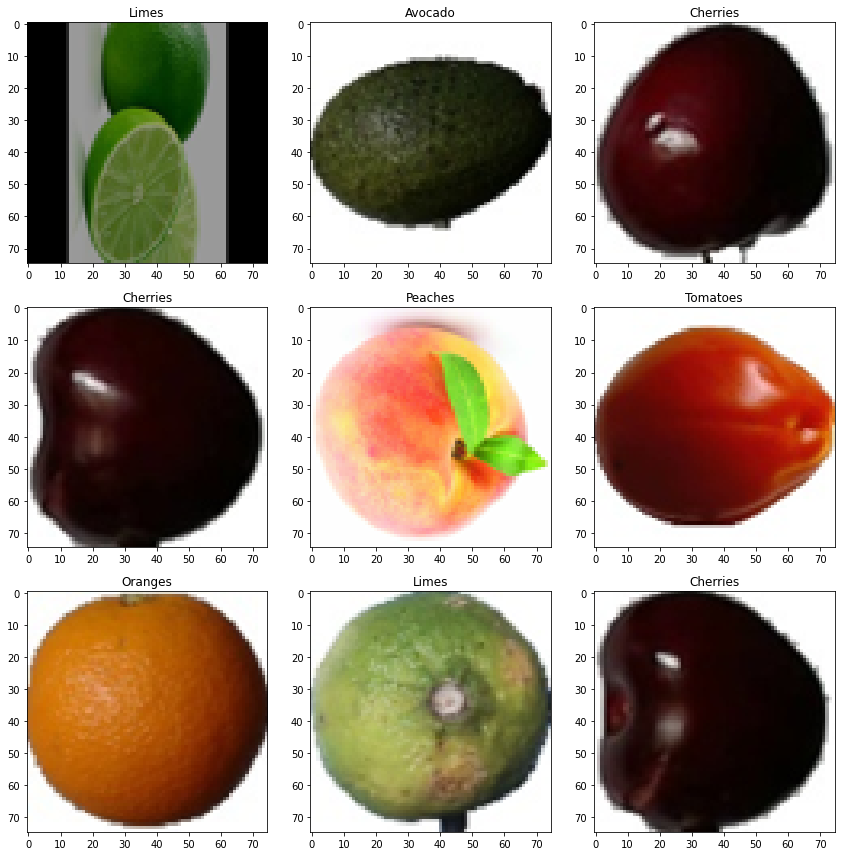

In [26]:
plot_random_images(x_train, y_train, labels)

<b>Lancement de l'entraînement</b>

In [27]:
METRICS = 'sparse_categorical_accuracy'

model = VGG16Network(len(labels), IMAGE_SIZE)
# Objet permettant d'augmenter davantage la taille de la base de données.
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=[METRICS])

train_generator = train_datagen.flow(x_train, y_train)
val_generator = train_datagen.flow(x_val, y_val)

history = model.fit(train_generator, 
                    validation_data=val_generator,
                    steps_per_epoch=train_generator.n // train_generator.batch_size,
                    validation_steps=val_generator.n // val_generator.batch_size,
                    epochs=10)

Model: "vgg16_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_2 (Dense)             multiple                  524544    
                                                                 
 dense_3 (Dense)             multiple                  4112      
                                                                 
Total params: 15,243,344
Trainable params: 528,656
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/10
274/274 [==============================] - 86s 311ms/step - loss: 1.9666 - sparse_categorical_accuracy: 0.4433 - val_loss: 1.8153 - val_sparse_categorical_a

<b>Analyse post-entraînement</b>
- <b>Prédiction de la classe</b> éventuelle d'une image test prise aléatoirement dans la base de donnée.
- Graphique montrant <b>l'évolution des métriques</b> au cours de l'entraînement sur les ensembles d'apprentissage et de validation.
- <b>Evalutation du modèle</b> dans sa globalité.

PREDICTIONS sur la donnée n°1328/1854
     Apple-Braeburn -> 0.00%
     Apple-Granny-Smith -> 0.00%
     Apricot -> 0.00%
     Avocado -> 0.02%
     Bananas -> 0.00%
     Blueberries -> 0.07%
     Cherries -> 0.00%
     Kiwi -> 0.05%
     Lemons -> 0.01%
     Limes -> 0.03%
     Oranges -> 0.01%
     Peaches -> 0.01%
     Pineapples -> 99.64%
     Strawberries -> 0.13%
     Tomatoes -> 0.00%
     Watermelons -> 0.03%

RESULTAT : Pineapples / 99.64%


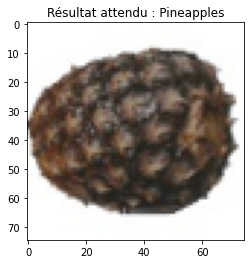

In [40]:
idx = randint(0, len(x_test) - 1)
test_data(model, labels, idx, x_test, y_test)

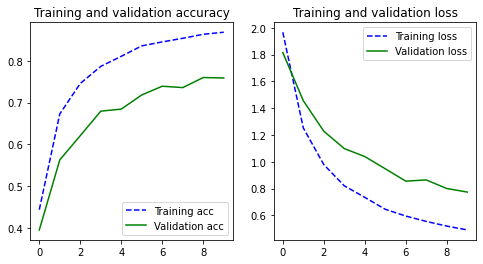

In [29]:
plot_training_analysis(history, METRICS)

In [30]:
print("EVALUATION DU MODELE " + model.name)
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=10)
print("Loss     : {0:.2f}%".format(loss_and_metrics[0] * 100))
print("Accuracy : {0:.2f}%".format(loss_and_metrics[1] * 100))

EVALUATION DU MODELE vgg16_network
186/186 [==============================] - 18s 95ms/step - loss: 0.6273 - sparse_categorical_accuracy: 0.8243
Loss     : 62.73%
Accuracy : 82.43%
